In [1]:
import urllib.request
url = ("https://raw.githubusercontent.com/rasbt/"
"LLMs-from-scratch/main/ch02/01_main-chapter-code/"
"the-verdict.txt")
file_path = "the-verdict.txt"

urllib.request.urlretrieve(url, file_path)

with open(file_path, "r", encoding="utf-8") as f:
    raw_text = f.read()

print(f"Total numbers of chars: {len(raw_text)}")
print(raw_text[:99])

Total numbers of chars: 20479
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no 


In [2]:
import re
file_path = "ch02/01_main-chapter-code/the-verdict.txt"
with open(file_path, "r", encoding="utf-8") as f:
    raw_text = f.read()
text = "Hello, world. This-- is a test?"
result = re.split(r'([,.:;?_!"()\']|--|\s)', text)
result = [item.strip() for item in result if item.strip()]
preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', raw_text)
preprocessed = [item.strip() for item in preprocessed if item.strip()]
print(len(preprocessed))
# print(preprocessed[:30])
# print(result)

all_words = sorted(set(preprocessed))
vocab_size = len(all_words)

vocab = {token:integer for integer,token in enumerate(all_words)}
for i, item in enumerate(vocab.items()):
    print(f"{item}")
    if i >= 50:
        break

4690
('!', 0)
('"', 1)
("'", 2)
('(', 3)
(')', 4)
(',', 5)
('--', 6)
('.', 7)
(':', 8)
(';', 9)
('?', 10)
('A', 11)
('Ah', 12)
('Among', 13)
('And', 14)
('Are', 15)
('Arrt', 16)
('As', 17)
('At', 18)
('Be', 19)
('Begin', 20)
('Burlington', 21)
('But', 22)
('By', 23)
('Carlo', 24)
('Chicago', 25)
('Claude', 26)
('Come', 27)
('Croft', 28)
('Destroyed', 29)
('Devonshire', 30)
('Don', 31)
('Dubarry', 32)
('Emperors', 33)
('Florence', 34)
('For', 35)
('Gallery', 36)
('Gideon', 37)
('Gisburn', 38)
('Gisburns', 39)
('Grafton', 40)
('Greek', 41)
('Grindle', 42)
('Grindles', 43)
('HAD', 44)
('Had', 45)
('Hang', 46)
('Has', 47)
('He', 48)
('Her', 49)
('Hermia', 50)


In [3]:
class SimpleTokenizerV1:
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = {i:s for s,i in vocab.items()}
    
    def encode(self, text):
        preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)
                                
        preprocessed = [item.strip() for item in preprocessed if item.strip()]
        ids = [self.str_to_int[s] for s in preprocessed]
        return ids
        
    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])
        # Replace spaces before the specified punctuations
        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
        return text

In [4]:
tokenizer = SimpleTokenizerV1(vocab)
text = """"It's the last he painted, you know,"Mrs. Gisburn said with pardonable pride."""

ids = tokenizer.encode(text)
print(ids)

print(tokenizer.decode(ids))

[1, 56, 2, 850, 988, 602, 533, 746, 5, 1126, 596, 5, 1, 67, 7, 38, 851, 1108, 754, 793, 7]
" It' s the last he painted, you know," Mrs. Gisburn said with pardonable pride.


In [5]:
all_tokens = sorted(list(set(preprocessed)))
all_tokens.extend(["<|endoftext|>", "<|unk|>"])
vocab = {token:integer for integer,token in enumerate(all_tokens)}
print(len(vocab.items()))

for i, item in enumerate(list(vocab.items())[-5:]):
    print(item)

1132
('younger', 1127)
('your', 1128)
('yourself', 1129)
('<|endoftext|>', 1130)
('<|unk|>', 1131)


In [6]:
class SimpleTokenizerV2:
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = {i:s for s,i in vocab.items()}
    
    def encode(self, text):
        preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)
                                
        preprocessed = [item.strip() for item in preprocessed if item.strip()]
        preprocessed = [item if item in self.str_to_int else "<|unk|>" for item in preprocessed]
        ids = [self.str_to_int[s] for s in preprocessed]
        return ids
        
    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])
        # Replace spaces before the specified punctuations
        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
        return text

In [7]:
text1 = "Hello, do you like tea?"
text2 = "In the sunlit terraces of the palace."
text = " <|endoftext|> ".join((text1, text2))
print(text)
tokenizer = SimpleTokenizerV2(vocab)
print(tokenizer.encode(text))
print(tokenizer.decode(tokenizer.encode(text)))

Hello, do you like tea? <|endoftext|> In the sunlit terraces of the palace.
[1131, 5, 355, 1126, 628, 975, 10, 1130, 55, 988, 956, 984, 722, 988, 1131, 7]
<|unk|>, do you like tea? <|endoftext|> In the sunlit terraces of the <|unk|>.


In [8]:
### 2.5 Byte pair encoding ####

In [9]:
from importlib.metadata import version
import tiktoken
print("tiktoken version:", version("tiktoken"))

tiktoken version: 0.12.0


In [10]:
tokenizer = tiktoken.get_encoding("gpt2")
text = (
"Hello, do you like tea? <|endoftext|> In the sunlit terraces of someunknownPlace."
)
integers = tokenizer.encode(text, allowed_special={"<|endoftext|>"})
print(integers)

[15496, 11, 466, 345, 588, 8887, 30, 220, 50256, 554, 262, 4252, 18250, 8812, 2114, 286, 617, 34680, 27271, 13]


In [11]:
strings = tokenizer.decode(integers)
print(strings)

Hello, do you like tea? <|endoftext|> In the sunlit terraces of someunknownPlace.


In [12]:
unknown_text = "Akwirw ier"
unk_ids = tokenizer.encode(unknown_text)
print(unk_ids)

[33901, 86, 343, 86, 220, 959]


In [13]:
print(tokenizer.decode(unk_ids))

Akwirw ier


In [14]:
### 2.6 Data sampling with a sliding window ####

In [15]:
file_path = "ch02/01_main-chapter-code/the-verdict.txt"
with open(file_path, "r", encoding="utf-8") as f:
    raw_text = f.read()
    
enc_text = tokenizer.encode(raw_text)
print(len(enc_text))

5145


In [16]:
enc_sample = enc_text[50:]
print(len(enc_sample))

context_size = 4 #Determines how many ids are included in the input
x = enc_sample[:context_size]
y = enc_sample[1:context_size + 1]
print(f"x: {x}")
print(f"y: \t{y}")

for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]
    print(context, "---->", desired)

5095
x: [290, 4920, 2241, 287]
y: 	[4920, 2241, 287, 257]
[290] ----> 4920
[290, 4920] ----> 2241
[290, 4920, 2241] ----> 287
[290, 4920, 2241, 287] ----> 257


In [17]:
for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]
    print(tokenizer.decode(context), "---->", tokenizer.decode([desired]))

 and ---->  established
 and established ---->  himself
 and established himself ---->  in
 and established himself in ---->  a


In [18]:
import torch
from torch.utils.data import Dataset, DataLoader

class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.input_ids = []
        self.target_ids = []
        token_ids = tokenizer.encode(txt)
        for i in range(0, len(token_ids) - max_length, stride):
            input_chunk = token_ids[i:i + max_length]
            target_chunk = token_ids[i + 1: i + max_length + 1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))
            
    def __len__(self):
        return len(self.input_ids)
        
    def __getitem__(self, idx):
        return self.input_ids[idx], self.target_ids[idx]

In [19]:
def create_dataloader_v1(txt, batch_size=4, max_length=256, stride=128, shuffle=True, drop_last=True, num_workers=0):
    tokenizer = tiktoken.get_encoding("gpt2")
    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, drop_last=drop_last, num_workers=num_workers)
    return dataloader

In [20]:
with open(file_path, "r", encoding="utf-8") as f:
    raw_text = f.read()
token_ids_aux = tokenizer.encode(raw_text)
dataloader = create_dataloader_v1(raw_text, batch_size=8, max_length=4, stride=1, shuffle=False)
data_iter = iter(dataloader)

# print(f"TOKENS:")
# for i in range (0, 200, 4):
#     print(f"{token_ids_aux[i:i+4]}")
num_batches=1
for i in range(0, num_batches):
    inputs, targets = next(data_iter)
    print(f"Inputs {i}:\n{inputs}")
    print(f"Targets {i}:\n{targets}")

Inputs 0:
tensor([[   40,   367,  2885,  1464],
        [  367,  2885,  1464,  1807],
        [ 2885,  1464,  1807,  3619],
        [ 1464,  1807,  3619,   402],
        [ 1807,  3619,   402,   271],
        [ 3619,   402,   271, 10899],
        [  402,   271, 10899,  2138],
        [  271, 10899,  2138,   257]])
Targets 0:
tensor([[  367,  2885,  1464,  1807],
        [ 2885,  1464,  1807,  3619],
        [ 1464,  1807,  3619,   402],
        [ 1807,  3619,   402,   271],
        [ 3619,   402,   271, 10899],
        [  402,   271, 10899,  2138],
        [  271, 10899,  2138,   257],
        [10899,  2138,   257,  7026]])


## 2.7 Creating token embeddings ####

In [21]:
input_ids = torch.tensor([2,3,5,1])
vocab_size = 6
output_dim = 3

torch.manual_seed(123)
embedding_layer = torch.nn.Embedding(vocab_size, output_dim)
print(embedding_layer.weight)

Parameter containing:
tensor([[ 0.3374, -0.1778, -0.1690],
        [ 0.9178,  1.5810,  1.3010],
        [ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096]], requires_grad=True)


In [22]:
print(embedding_layer(torch.tensor([5])))

tensor([[-2.8400, -0.7849, -1.4096]], grad_fn=<EmbeddingBackward0>)


In [23]:
print(embedding_layer(input_ids))

tensor([[ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-2.8400, -0.7849, -1.4096],
        [ 0.9178,  1.5810,  1.3010]], grad_fn=<EmbeddingBackward0>)


In [24]:
vocab_size = 50257
output_dim = 256

token_embedding_layer = torch.nn.Embedding(vocab_size, output_dim)

max_length = 4
dataloader = create_dataloader_v1(raw_text, batch_size=8, max_length=max_length, stride=max_length, shuffle=False)

data_iter = iter(dataloader)
inputs, targets = next(data_iter)
print("Token IDs:\n", inputs)
print("\nInputs shape:\n", inputs.shape)
# print("\nTargets shape:\n", targets.shape)


Token IDs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Inputs shape:
 torch.Size([8, 4])


In [25]:
token_embeddings = token_embedding_layer(inputs)
print(token_embeddings.shape)

torch.Size([8, 4, 256])


In [26]:
context_length = max_length
pos_embedding_layer = torch.nn.Embedding(context_length, output_dim)
pos_embeddings = pos_embedding_layer(torch.arange(context_length))
print(pos_embeddings.shape)
print(pos_embeddings)


torch.Size([4, 256])
tensor([[ 1.7375, -0.5620, -0.6303,  ..., -0.2277,  1.5748,  1.0345],
        [ 1.6423, -0.7201,  0.2062,  ...,  0.4118,  0.1498, -0.4628],
        [-0.4651, -0.7757,  0.5806,  ...,  1.4335, -0.4963,  0.8579],
        [-0.6754, -0.4628,  1.4323,  ...,  0.8139, -0.7088,  0.4827]],
       grad_fn=<EmbeddingBackward0>)


In [27]:
input_embeddings = token_embeddings + pos_embeddings
print(input_embeddings.shape)
print(f"Tokens_embedding: {token_embeddings[1, 1, :3]}")
print(f"Pos_embeddings: {pos_embeddings[1, :3]}")
print(f"Input_embeddings: {input_embeddings[1, 1, :3]}")

torch.Size([8, 4, 256])
Tokens_embedding: tensor([-1.8622, -0.1914, -0.3812], grad_fn=<SliceBackward0>)
Pos_embeddings: tensor([ 1.6423, -0.7201,  0.2062], grad_fn=<SliceBackward0>)
Input_embeddings: tensor([-0.2199, -0.9114, -0.1750], grad_fn=<SliceBackward0>)


# CHAPTER 3 - Coding attention mechanisms

### 3.3.1 A simple self-attention mechanism without trainable weights

In [28]:

inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)

In [29]:
query = inputs[1]
attn_scores_2 = torch.empty(inputs.shape[0])
for i, x_i in enumerate(inputs):
    attn_scores_2[i] = torch.dot(x_i, query)
print(attn_scores_2)

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


In [30]:
attn_weights_2_tmp = attn_scores_2 / attn_scores_2.sum()
print("Attention weights:", attn_weights_2_tmp)
print("Sum:", attn_weights_2_tmp.sum())

Attention weights: tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
Sum: tensor(1.0000)


In [31]:
attn_weights_2 = torch.softmax(attn_scores_2, dim=0)
print("Attention weights:", attn_weights_2)
print("Sum:", attn_weights_2.sum())

Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum: tensor(1.)


In [32]:
query = inputs[1]
context_vec_2 = torch.zeros(query.shape)
for i,x_i in enumerate(inputs):
    context_vec_2 += attn_weights_2[i]*x_i
print(context_vec_2)

tensor([0.4419, 0.6515, 0.5683])


### 3.3.2 Computing attention weights for all input tokens

In [33]:
attn_scores = torch.empty(6, 6)
for i, x_i in enumerate(inputs):
    for j, x_j in enumerate(inputs):
        attn_scores[i, j] = torch.dot(x_i, x_j)     

print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [34]:
attn_scores = inputs @ inputs.T
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [35]:
attn_weights = torch.softmax(attn_scores, dim=-1) # Normalization across the las dimension (columns)
print(attn_weights)
print(attn_weights.sum(dim=-1))

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


In [36]:
all_context_vecs = attn_weights @ inputs
print(all_context_vecs)

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])


In [37]:
print(attn_weights.shape)
print(inputs.shape)

torch.Size([6, 6])
torch.Size([6, 3])


## 3.4 Implementing self-attention with trainable weights ####

In [38]:
x_2 = inputs[1]
d_in = inputs.shape[1]
d_out = 2

In [39]:
torch.manual_seed(123)
# requires_grad=False to reduce clutter in the outputs, but if we were to use
# the weight matrices for model training, we would set requires_grad=True to update
# these matrices during model training.

W_query = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_key = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_value = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
print(W_query)

Parameter containing:
tensor([[0.2961, 0.5166],
        [0.2517, 0.6886],
        [0.0740, 0.8665]])


In [40]:
query_2 = x_2 @ W_query
key_2 = x_2 @ W_key
value_2 = x_2 @ W_value
print(query_2)

tensor([0.4306, 1.4551])


In [41]:
keys = inputs @ W_key
values = inputs @ W_value
print("keys.shape:", keys.shape)
print("values.shape:", values.shape)

keys.shape: torch.Size([6, 2])
values.shape: torch.Size([6, 2])


In [42]:
keys_2 = keys[1]
attn_score_22 = query_2.dot(keys_2)
print(attn_score_22)

tensor(1.8524)


In [43]:
attn_scores_2 = query_2 @ keys.T
print(attn_scores_2)

tensor([1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440])


In [44]:
d_k = keys.shape[-1]
attn_weights_2 = torch.softmax(attn_scores_2 / d_k**0.5, dim=-1)
print(attn_weights_2)

tensor([0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820])


In [45]:
context_vec_2 = attn_weights_2 @ values
print(context_vec_2)

tensor([0.3061, 0.8210])


### 3.4.2 Implementing a compact SelfAttention class

In [46]:
import torch.nn as nn
class SelfAttention_v1(nn.Module):
    def __init__(self, d_in, d_out):
        super().__init__()
        self.W_query = nn.Parameter(torch.rand(d_in, d_out))
        self.W_key = nn.Parameter(torch.rand(d_in, d_out))
        self.W_value = nn.Parameter(torch.rand(d_in, d_out))

    def forward(self, x):
        keys = x @ self.W_key
        queries = x @ self.W_query
        values = x @ self.W_value
        
        attn_scores = queries @ keys.T
        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
        
        context_vec = attn_weights @ values
        return context_vec

In [47]:
torch.manual_seed(123)
sa_v1 = SelfAttention_v1(d_in, d_out)
print(sa_v1(inputs))

tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]], grad_fn=<MmBackward0>)


In [48]:
m = torch.nn.Linear(3, 2)
m.weight

Parameter containing:
tensor([[-0.1362,  0.1853,  0.4083],
        [ 0.1076,  0.1579,  0.5573]], requires_grad=True)

In [49]:
n = nn.Parameter(torch.rand(3, 2))
n.T

tensor([[0.2775, 0.8993, 0.9268],
        [0.8573, 0.0390, 0.7388]], grad_fn=<PermuteBackward0>)

In [50]:
class SelfAttention_v2(nn.Module):
    def __init__(self, d_in, d_out, qkv_bias=False):
        super().__init__()
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        
    def forward(self, x):
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)
        attn_scores = queries @ keys.T
        attn_weights = torch.softmax(
        attn_scores / keys.shape[-1]**0.5, dim=-1
        )
        context_vec = attn_weights @ values
        return context_vec

In [51]:
sa_v2 = SelfAttention_v2(d_in, d_out)

print(sa_v2(inputs))

tensor([[-0.0556,  0.5242],
        [-0.0550,  0.5207],
        [-0.0551,  0.5208],
        [-0.0557,  0.5226],
        [-0.0559,  0.5243],
        [-0.0553,  0.5213]], grad_fn=<MmBackward0>)


### _Exercise 3.1 Comparing SelfAttention_v1 and SelfAttention_v2_

In [52]:
print(f"W_Query_v1 wieghts:\n{sa_v1.W_query}")
print(f"W_Query_v2 wieghts:\n{sa_v2.W_query.weight}")
print("Se puede observar que los pesos en sa_v1 son una matriz traspuesta de los pesos sa_v2 (se intercambian las dimensiones)")
with torch.no_grad():
    sa_v1.W_query.copy_(sa_v2.W_query.weight.T)
    sa_v1.W_key.copy_(sa_v2.W_key.weight.T)
    sa_v1.W_value.copy_(sa_v2.W_value.weight.T)

W_Query_v1 wieghts:
Parameter containing:
tensor([[0.2961, 0.5166],
        [0.2517, 0.6886],
        [0.0740, 0.8665]], requires_grad=True)
W_Query_v2 wieghts:
Parameter containing:
tensor([[ 0.2516,  0.2377,  0.4800],
        [-0.0762, -0.4883, -0.1657]], requires_grad=True)
Se puede observar que los pesos en sa_v1 son una matriz traspuesta de los pesos sa_v2 (se intercambian las dimensiones)


In [53]:
print(sa_v1(inputs))

tensor([[-0.0556,  0.5242],
        [-0.0550,  0.5207],
        [-0.0551,  0.5208],
        [-0.0557,  0.5226],
        [-0.0559,  0.5243],
        [-0.0553,  0.5213]], grad_fn=<MmBackward0>)


## 3.5 Hiding future words with casual attention

### 3.5.1 Applying a causal attention mask

In [54]:
queries = sa_v2.W_query(inputs)
keys = sa_v2.W_key(inputs)
print("Queries shape:", queries.shape)
print("Keys shape:", keys.shape)
attn_scores = queries @ keys.T
attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
print(attn_weights)

Queries shape: torch.Size([6, 2])
Keys shape: torch.Size([6, 2])
tensor([[0.1566, 0.1625, 0.1625, 0.1752, 0.1691, 0.1740],
        [0.1481, 0.1610, 0.1615, 0.1779, 0.1805, 0.1709],
        [0.1485, 0.1611, 0.1616, 0.1778, 0.1802, 0.1709],
        [0.1554, 0.1636, 0.1640, 0.1729, 0.1759, 0.1683],
        [0.1597, 0.1643, 0.1645, 0.1715, 0.1704, 0.1696],
        [0.1515, 0.1625, 0.1630, 0.1750, 0.1796, 0.1685]],
       grad_fn=<SoftmaxBackward0>)


In [55]:
context_length = attn_scores.shape[0]
mask_simple = torch.tril(torch.ones(context_length, context_length))
print(mask_simple)

tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])


In [56]:
masked_simple = attn_weights * mask_simple
print(masked_simple)

tensor([[0.1566, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1481, 0.1610, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1485, 0.1611, 0.1616, 0.0000, 0.0000, 0.0000],
        [0.1554, 0.1636, 0.1640, 0.1729, 0.0000, 0.0000],
        [0.1597, 0.1643, 0.1645, 0.1715, 0.1704, 0.0000],
        [0.1515, 0.1625, 0.1630, 0.1750, 0.1796, 0.1685]],
       grad_fn=<MulBackward0>)


In [57]:
row_sums = masked_simple.sum(dim=-1, keepdim=True)
masked_simple_norm = masked_simple / row_sums
print(masked_simple_norm)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4792, 0.5208, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3151, 0.3419, 0.3430, 0.0000, 0.0000, 0.0000],
        [0.2370, 0.2494, 0.2500, 0.2636, 0.0000, 0.0000],
        [0.1923, 0.1979, 0.1981, 0.2065, 0.2052, 0.0000],
        [0.1515, 0.1625, 0.1630, 0.1750, 0.1796, 0.1685]],
       grad_fn=<DivBackward0>)


In [58]:
mask = torch.triu(torch.ones(context_length, context_length), diagonal=1)
print(mask)
masked = attn_scores.masked_fill(mask.bool(), -torch.inf)
print(masked)

tensor([[0., 1., 1., 1., 1., 1.],
        [0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0.]])
tensor([[-0.2390,    -inf,    -inf,    -inf,    -inf,    -inf],
        [-0.3746, -0.2567,    -inf,    -inf,    -inf,    -inf],
        [-0.3682, -0.2526, -0.2479,    -inf,    -inf,    -inf],
        [-0.2158, -0.1434, -0.1401, -0.0652,    -inf,    -inf],
        [-0.1481, -0.1074, -0.1062, -0.0472, -0.0558,    -inf],
        [-0.2916, -0.1925, -0.1878, -0.0878, -0.0511, -0.1411]],
       grad_fn=<MaskedFillBackward0>)


In [59]:
attn_weights = torch.softmax(masked / keys.shape[-1]**0.5, dim=1)
print(attn_weights)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4792, 0.5208, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3151, 0.3419, 0.3430, 0.0000, 0.0000, 0.0000],
        [0.2370, 0.2494, 0.2500, 0.2636, 0.0000, 0.0000],
        [0.1923, 0.1979, 0.1981, 0.2065, 0.2052, 0.0000],
        [0.1515, 0.1625, 0.1630, 0.1750, 0.1796, 0.1685]],
       grad_fn=<SoftmaxBackward0>)


### 3.5.2 Masking additional attention weights with dropout

In [60]:
torch.manual_seed(123)
dropout = torch.nn.Dropout(0.5) # 50% dropout
example = torch.ones(6, 6)
print(dropout(example)) #To compensate for the reduction inactive elements, the values of the remaining elements in the matrix are scaled up by afactor of 1/0.5 = 2.


tensor([[2., 2., 0., 2., 2., 0.],
        [0., 0., 0., 2., 0., 2.],
        [2., 2., 2., 2., 0., 2.],
        [0., 2., 2., 0., 0., 2.],
        [0., 2., 0., 2., 0., 2.],
        [0., 2., 2., 2., 2., 0.]])


In [61]:
torch.manual_seed(123)
print(dropout(attn_weights))

tensor([[2.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.6301, 0.6838, 0.6861, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.4988, 0.5000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.3958, 0.0000, 0.4130, 0.0000, 0.0000],
        [0.0000, 0.3250, 0.3260, 0.3499, 0.3591, 0.0000]],
       grad_fn=<MulBackward0>)


### 3.5.3 Implementing a compact causal attention class

In [62]:
batch = torch.stack((inputs, inputs), dim=0)
print(batch.shape)

torch.Size([2, 6, 3])


In [63]:
class CausalAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, qkv_bias=False):
        super().__init__()
        self.d_out = d_out
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.dropout = nn.Dropout(dropout)
        self.register_buffer('mask', torch.triu(torch.ones(context_length, context_length), diagonal=1))
        
    def forward(self, x):
        b, num_tokens, d_in = x.shape
        # x = batch, 2x6x3
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)
        attn_scores = queries @ keys.transpose(1, 2)
        attn_scores.masked_fill_(self.mask.bool()[:num_tokens, :num_tokens], -torch.inf) #New, _ ops are in-place.
        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
        attn_weights = self.dropout(attn_weights)
        context_vec = attn_weights @ values
        return context_vec     

In [64]:
torch.manual_seed(123)
context_length = batch.shape[1]
print(batch.shape)
dropout = 0.0
ca = CausalAttention(d_in, d_out, context_length, dropout)
context_vecs = ca(batch)
print("context_vecs.shape:", context_vecs.shape)

torch.Size([2, 6, 3])
context_vecs.shape: torch.Size([2, 6, 2])


In [65]:
context_vecs

tensor([[[-0.4519,  0.2216],
         [-0.5874,  0.0058],
         [-0.6300, -0.0632],
         [-0.5675, -0.0843],
         [-0.5526, -0.0981],
         [-0.5299, -0.1081]],

        [[-0.4519,  0.2216],
         [-0.5874,  0.0058],
         [-0.6300, -0.0632],
         [-0.5675, -0.0843],
         [-0.5526, -0.0981],
         [-0.5299, -0.1081]]], grad_fn=<UnsafeViewBackward0>)

## 3.6 Extending single-head attention to multi-head attention

### 3.6.1 Stacking multiple single-head attention layers

In [66]:
class MultiHeadAttentionWrapper(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        self.heads = nn.ModuleList([CausalAttention(d_in, d_out, context_length, dropout, qkv_bias)for _ in range(num_heads)])
    
    def forward(self, x):
        return torch.cat([head(x) for head in self.heads], dim=-1)

In [67]:
torch.manual_seed(123)
context_length = batch.shape[1] # This is the number of tokens
d_in, d_out = 3, 2
context_length

6

In [68]:
dropout = 0.0
mha = MultiHeadAttentionWrapper(d_in, d_out, context_length, dropout, num_heads=2)
context_vecs = mha(batch)
print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)

tensor([[[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5874,  0.0058,  0.5891,  0.3257],
         [-0.6300, -0.0632,  0.6202,  0.3860],
         [-0.5675, -0.0843,  0.5478,  0.3589],
         [-0.5526, -0.0981,  0.5321,  0.3428],
         [-0.5299, -0.1081,  0.5077,  0.3493]],

        [[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5874,  0.0058,  0.5891,  0.3257],
         [-0.6300, -0.0632,  0.6202,  0.3860],
         [-0.5675, -0.0843,  0.5478,  0.3589],
         [-0.5526, -0.0981,  0.5321,  0.3428],
         [-0.5299, -0.1081,  0.5077,  0.3493]]], grad_fn=<CatBackward0>)
context_vecs.shape: torch.Size([2, 6, 4])


### _Exercise 3.2 Returning two-dimensional embedding vectors_

In [69]:
d_in_ex, d_out_ex = 3, 1

In [70]:
mha_ex = MultiHeadAttentionWrapper(d_in_ex, d_out_ex, context_length, dropout, num_heads=2)

In [71]:
context_vecs = mha_ex(batch)
print(context_vecs)
print("Exercise 3.2: context_vecs.shape:", context_vecs.shape)

tensor([[[0.0189, 0.2729],
         [0.2181, 0.3037],
         [0.2804, 0.3125],
         [0.2830, 0.2793],
         [0.2476, 0.2541],
         [0.2748, 0.2513]],

        [[0.0189, 0.2729],
         [0.2181, 0.3037],
         [0.2804, 0.3125],
         [0.2830, 0.2793],
         [0.2476, 0.2541],
         [0.2748, 0.2513]]], grad_fn=<CatBackward0>)
Exercise 3.2: context_vecs.shape: torch.Size([2, 6, 2])


### 3.6.2 Implementing multi-head attention with weight splits

In [72]:
class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        assert (d_out % num_heads == 0), "d_out must be divisible by num_heads"
        self.d_out = d_out
        self.num_heads = num_heads
        self.head_dim = d_out // num_heads
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.out_proj = nn.Linear(d_out, d_out)
        self.dropout = nn.Dropout(dropout)
        self.register_buffer("mask", torch.triu(torch.ones(context_length, context_length), diagonal=1))
    def forward(self, x):
        b, num_tokens, d_in = x.shape
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)
        keys = keys.view(b, num_tokens, self.num_heads, self.head_dim)
        values = values.view(b, num_tokens, self.num_heads, self.head_dim)
        queries = queries.view(b, num_tokens, self.num_heads, self.head_dim)
        keys = keys.transpose(1, 2)
        queries = queries.transpose(1, 2)
        values = values.transpose(1, 2)
        attn_scores = queries @ keys.transpose(2, 3)
        mask_bool = self.mask.bool()[:num_tokens, :num_tokens]
        attn_scores.masked_fill_(mask_bool, -torch.inf)
        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
        attn_weights = self.dropout(attn_weights)
        context_vec = (attn_weights @ values).transpose(1, 2)
        context_vec = context_vec.contiguous().view(b, num_tokens, self.d_out)
        context_vec = self.out_proj(context_vec)
        return context_vec

In [73]:
a = torch.tensor([[[[0.2745, 0.6584, 0.2775, 0.8573],
[0.8993, 0.0390, 0.9268, 0.7388],
[0.7179, 0.7058, 0.9156, 0.4340]],
[[0.0772, 0.3565, 0.1479, 0.5331],
[0.4066, 0.2318, 0.4545, 0.9737],
[0.4606, 0.5159, 0.4220, 0.5786]]]])
print("AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA")
print(a.shape)
print(a)
print("BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB")
b = a.transpose(2, 3)
print(b.shape)
print(b)
c = a @ b
print("CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC")
print(c.shape)
print(c)


AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
torch.Size([1, 2, 3, 4])
tensor([[[[0.2745, 0.6584, 0.2775, 0.8573],
          [0.8993, 0.0390, 0.9268, 0.7388],
          [0.7179, 0.7058, 0.9156, 0.4340]],

         [[0.0772, 0.3565, 0.1479, 0.5331],
          [0.4066, 0.2318, 0.4545, 0.9737],
          [0.4606, 0.5159, 0.4220, 0.5786]]]])
BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB
torch.Size([1, 2, 4, 3])
tensor([[[[0.2745, 0.8993, 0.7179],
          [0.6584, 0.0390, 0.7058],
          [0.2775, 0.9268, 0.9156],
          [0.8573, 0.7388, 0.4340]],

         [[0.0772, 0.4066, 0.4606],
          [0.3565, 0.2318, 0.5159],
          [0.1479, 0.4545, 0.4220],
          [0.5331, 0.9737, 0.5786]]]])
CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC
torch.Size([1, 2, 3, 3])
tensor([[[[1.3208, 1.1631, 1.2879],
          [1.1631, 2.2150, 1.8424],
          [1.2879, 1.8424, 2.0402]],

         [[0.4391, 0.7003, 0.5903],
          [0.7003, 1.3737, 1.0620],
          [0.5903, 1.0620, 0.9912]]]])


In [74]:
torch.manual_seed(123)
batch_size, context_length, d_in = batch.shape
d_out = 4
mha = MultiHeadAttention(d_in, d_out, context_length, 0.0, num_heads=2)
context_vecs = mha(batch)
print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)

tensor([[[ 0.1184,  0.3120, -0.0847, -0.5774],
         [ 0.0178,  0.3221, -0.0763, -0.4225],
         [-0.0147,  0.3259, -0.0734, -0.3721],
         [-0.0116,  0.3138, -0.0708, -0.3624],
         [-0.0117,  0.2973, -0.0698, -0.3543],
         [-0.0132,  0.2990, -0.0689, -0.3490]],

        [[ 0.1184,  0.3120, -0.0847, -0.5774],
         [ 0.0178,  0.3221, -0.0763, -0.4225],
         [-0.0147,  0.3259, -0.0734, -0.3721],
         [-0.0116,  0.3138, -0.0708, -0.3624],
         [-0.0117,  0.2973, -0.0698, -0.3543],
         [-0.0132,  0.2990, -0.0689, -0.3490]]], grad_fn=<ViewBackward0>)
context_vecs.shape: torch.Size([2, 6, 4])


## _Exercise 3.3 Initializing GPT-2 size attention modules_

In [75]:
d_in_ex3_3 = 768
d_out_ex3_3 = 768
context_length_ex3_3 = 1024
num_heads_ex3_3 = 12
mha_ex3_3 = MultiHeadAttention(d_in_ex3_3, d_out_ex3_3, context_length_ex3_3, 0.0, num_heads_ex3_3)

# 4. Implementing a GPT model from scratch to generate text

## 4.1 Coding an LLM architecture

In [76]:
GPT_CONFIG_124M = {
    "vocab_size": 50257, # Vocabulary size
    "context_length": 1024, # Context length
    "emb_dim": 768, # Embedding dimension
    "n_heads": 12, # Number of attention heads
    "n_layers": 12, # Number of layers
    "drop_rate": 0.1, # Dropout rate
    "qkv_bias": False # Query-Key-Value bias
}

In [77]:
import torch
import torch.nn as nn
class DummyGPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])
        self.trf_blocks = nn.Sequential(*[DummyTransformerBlock(cfg) for _ in range(cfg["n_layers"])]) # Uses a placeholder for TransformerBlock
        self.final_norm = DummyLayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(cfg["emb_dim"], cfg["vocab_size"], bias=False)
    def forward(self, in_idx):
        batch_size, seq_len = in_idx.shape
        tok_embeds = self.tok_emb(in_idx)
        pos_embeds = self.pos_emb(torch.arange(seq_len, device=in_idx.device))
        x = tok_embeds + pos_embeds
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x) #!! Vector is projected in vocabulary space.
        return logits
        
class DummyTransformerBlock(nn.Module): # A simple placeholder class that will be replaced by a real TransformerBlock later
    def __init__(self, cfg):
        super().__init__()
    def forward(self, x):
        return x
        
class DummyLayerNorm(nn.Module): # A simple placeholder class that will be replaced by a real LayerNorm later
    def __init__(self, normalized_shape, eps=1e-5): # The parameters here are just to mimic the LayerNorm interface.
        super().__init__()
    def forward(self, x):
        return x

In [78]:
import tiktoken
tokenizer = tiktoken.get_encoding("gpt2")
batch = []
txt1 = "Every effort moves you"
txt2 = "Every day holds a"
batch.append(torch.tensor(tokenizer.encode(txt1)))
batch.append(torch.tensor(tokenizer.encode(txt2)))
batch = torch.stack(batch, dim=0)
print(batch)

tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])


In [79]:
torch.manual_seed(123)
model = DummyGPTModel(GPT_CONFIG_124M)
logits = model(batch)
print("Output shape:", logits.shape)
print(logits)

Output shape: torch.Size([2, 4, 50257])
tensor([[[-1.2034,  0.3201, -0.7130,  ..., -1.5548, -0.2390, -0.4667],
         [-0.1192,  0.4539, -0.4432,  ...,  0.2392,  1.3469,  1.2430],
         [ 0.5307,  1.6720, -0.4695,  ...,  1.1966,  0.0111,  0.5835],
         [ 0.0139,  1.6755, -0.3388,  ...,  1.1586, -0.0435, -1.0400]],

        [[-1.0908,  0.1798, -0.9484,  ..., -1.6047,  0.2439, -0.4530],
         [-0.7860,  0.5581, -0.0610,  ...,  0.4835, -0.0077,  1.6621],
         [ 0.3567,  1.2698, -0.6398,  ..., -0.0162, -0.1296,  0.3717],
         [-0.2407, -0.7349, -0.5102,  ...,  2.0057, -0.3694,  0.1814]]],
       grad_fn=<UnsafeViewBackward0>)


## 4.2 Normalizing activations with layer normalization

In [80]:
torch.manual_seed(123)
batch_example = torch.randn(2, 5)
layer = nn.Sequential(nn.Linear(5, 6), nn.ReLU())
out = layer(batch_example)
print(out)

tensor([[0.2260, 0.3470, 0.0000, 0.2216, 0.0000, 0.0000],
        [0.2133, 0.2394, 0.0000, 0.5198, 0.3297, 0.0000]],
       grad_fn=<ReluBackward0>)


In [81]:
mean = out.mean(dim=-1, keepdim=True)
var = out.var(dim=-1, keepdim=True)
print("Mean:\n", mean)
print("Variance:\n", var)

Mean:
 tensor([[0.1324],
        [0.2170]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[0.0231],
        [0.0398]], grad_fn=<VarBackward0>)


In [82]:
torch.manual_seed(123)
out_norm = (out - mean) / torch.sqrt(var)
mean = out_norm.mean(dim=-1, keepdim=True)
var = out_norm.var(dim=-1, keepdim=True)
print("Normalized layer outputs:\n", out_norm)
print("Mean:\n", mean)
print("Variance:\n", var)

Normalized layer outputs:
 tensor([[ 0.6159,  1.4126, -0.8719,  0.5872, -0.8719, -0.8719],
        [-0.0189,  0.1121, -1.0876,  1.5173,  0.5647, -1.0876]],
       grad_fn=<DivBackward0>)
Mean:
 tensor([[9.9341e-09],
        [1.9868e-08]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


In [83]:
torch.set_printoptions(sci_mode=False) # Turn off the scientific notation when printing tensor values
print("Mean:\n", mean)
print("Variance:\n", var)

Mean:
 tensor([[0.0000],
        [0.0000]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


In [84]:
class LayerNorm(nn.Module):
    def __init__(self, emb_dim):
        super().__init__()
        self.eps = 1e-5 # Prevents division by zero during normalization.
        self.scale = nn.Parameter(torch.ones(emb_dim)) # Trainable parameter
        self.shift = nn.Parameter(torch.zeros(emb_dim)) # Trainable parameter
    def forward(self, x):
        mean = x.mean(dim=-1, keepdim=True)
        var = x.var(dim=-1, keepdim=True, unbiased=False)
        norm_x = (x - mean) / torch.sqrt(var + self.eps)
        return self.scale * norm_x + self.shift

In [85]:
ln = LayerNorm(emb_dim=5)
out_ln = ln(batch_example)
mean = out_ln.mean(dim=-1, keepdim=True)
var = out_ln.var(dim=-1, unbiased=False, keepdim=True)
print("Mean:\n", mean)
print("Variance:\n", var)

Mean:
 tensor([[-0.0000],
        [ 0.0000]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


## 4.3 Implementing a feed forward network with GELU activations

In [86]:
class GELU(nn.Module):
    def __init__(self):
        super().__init__()
    def forward(self, x):
        return 0.5 * x * (1 + torch.tanh(torch.sqrt(torch.tensor(2.0 / torch.pi)) * (x + 0.044715 * torch.pow(x, 3))))

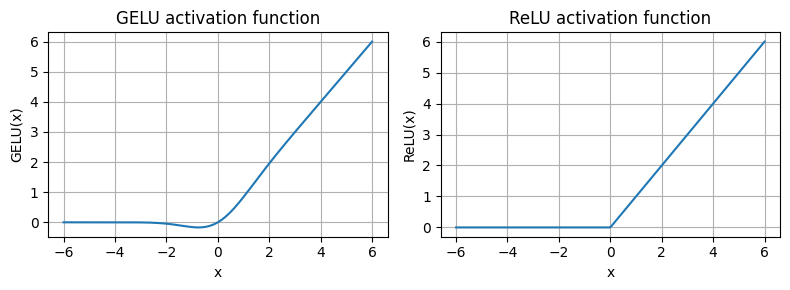

In [87]:
import matplotlib.pyplot as plt
gelu, relu = GELU(), nn.ReLU()
x = torch.linspace(-6, 6, 200)
y_gelu, y_relu = gelu(x), relu(x)
plt.figure(figsize=(8, 3))
for i, (y, label) in enumerate(zip([y_gelu, y_relu], ["GELU", "ReLU"]), 1):
    plt.subplot(1, 2, i)
    plt.plot(x, y)
    plt.title(f"{label} activation function")
    plt.xlabel("x")
    plt.ylabel(f"{label}(x)")
    plt.grid(True)
plt.tight_layout()
plt.show()

In [88]:
class FeedForward(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(cfg["emb_dim"], 4 * cfg["emb_dim"]),
        GELU(),
        nn.Linear(4 * cfg["emb_dim"], cfg["emb_dim"]),)
    def forward(self, x):
        return self.layers(x)

In [89]:
ffn = FeedForward(GPT_CONFIG_124M)
x = torch.rand(2, 3, 768)
out = ffn(x)
print(out.shape)


torch.Size([2, 3, 768])


## 4.4 Adding shorcut connections

In [90]:
class ExampleDeepNeuralNetwork(nn.Module):
    def __init__(self, layer_sizes, use_shortcut):
        super().__init__()
        self.use_shortcut = use_shortcut
        self.layers = nn.ModuleList([
            nn.Sequential(nn.Linear(layer_sizes[0], layer_sizes[1]),
            GELU()),
            nn.Sequential(nn.Linear(layer_sizes[1], layer_sizes[2]),
            GELU()),
            nn.Sequential(nn.Linear(layer_sizes[2], layer_sizes[3]),
            GELU()),
            nn.Sequential(nn.Linear(layer_sizes[3], layer_sizes[4]),
            GELU()),
            nn.Sequential(nn.Linear(layer_sizes[4], layer_sizes[5]),
            GELU())
            ])

    def forward(self, x):
        for layer in self.layers:
            layer_output = layer(x)
            if self.use_shortcut and x.shape == layer_output.shape:
                x = x + layer_output
            else:
                x = layer_output
        return x

In [91]:
layer_sizes = [3, 3, 3, 3, 3, 1]
sample_input = torch.tensor([[1., 0., -1.]])
torch.manual_seed(123)
model_without_shortcut = ExampleDeepNeuralNetwork(layer_sizes, use_shortcut=False)

In [92]:
def print_gradients(model, x):
    output = model(x)
    target = torch.tensor([[0.]])
    
    loss = nn.MSELoss()
    loss = loss(output, target)
    
    loss.backward() #convenient method in PyTorch that computes loss gradients
     
    for name, param in model.named_parameters():
        if 'weight' in name:
            print(f"{name} has gradient mean of {param.grad.abs().mean().item()}")

In [93]:
print_gradients(model_without_shortcut, sample_input)

layers.0.0.weight has gradient mean of 0.00020173587836325169
layers.1.0.weight has gradient mean of 0.00012011159560643137
layers.2.0.weight has gradient mean of 0.0007152040489017963
layers.3.0.weight has gradient mean of 0.0013988736318424344
layers.4.0.weight has gradient mean of 0.005049645435065031


In [94]:
torch.manual_seed(123)
model_with_shortcut = ExampleDeepNeuralNetwork(layer_sizes, use_shortcut=True)

print_gradients(model_with_shortcut, sample_input)

layers.0.0.weight has gradient mean of 0.22169798612594604
layers.1.0.weight has gradient mean of 0.20694111287593842
layers.2.0.weight has gradient mean of 0.3289700150489807
layers.3.0.weight has gradient mean of 0.26657330989837646
layers.4.0.weight has gradient mean of 1.3258544206619263


## 4.5 Connecting attention and linear layers in a transformer block

In [96]:
class TransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.att = MultiHeadAttention(
            d_in=cfg["emb_dim"],
            d_out=cfg["emb_dim"],
            context_length=cfg["context_length"],
            num_heads=cfg["n_heads"],
            dropout=cfg["drop_rate"],
            qkv_bias=cfg["qkv_bias"])
        self.ff = FeedForward(cfg)
        self.norm1 = LayerNorm(cfg["emb_dim"])
        self.norm2 = LayerNorm(cfg["emb_dim"])
        self.drop_shortcut = nn.Dropout(cfg["drop_rate"])
    def forward(self, x):
        shortcut = x #Shortcut connection for attention block
        x = self.norm1(x)
        x = self.att(x)
        x = self.drop_shortcut(x)
        x = x + shortcut # Adds the original input back
        
        shortcut = x #Shortcut connection for feed forward block
        x = self.norm2(x)
        x = self.ff(x)
        x = self.drop_shortcut(x)
        x = x + shortcut # Adds the original input back
        return x

In [98]:
torch.manual_seed(123)
x = torch.rand(2, 4, 768)
block = TransformerBlock(GPT_CONFIG_124M)
output = block(x)

print("Input shape:", x.shape)
print("Output shape:", output.shape)

Input shape: torch.Size([2, 4, 768])
Output shape: torch.Size([2, 4, 768])


In [100]:
class GPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])
        self.trf_blocks = nn.Sequential(*[TransformerBlock(cfg) for _ in range(cfg["n_layers"])])
        self.final_norm = LayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(cfg["emb_dim"], cfg["vocab_size"], bias=False)
        
    def forward(self, in_idx):
        batch_size, seq_len = in_idx.shape
        tok_embeds = self.tok_emb(in_idx)
        pos_embeds = self.pos_emb(torch.arange(seq_len, device=in_idx.device)) #The device setting will allow us to train the model on a CPU or GPU, depending on which device the input data sits on.
        x = tok_embeds + pos_embeds
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits

In [101]:
torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)
out = model(batch)
print("Input batch:\n", batch)
print("\nOutput shape:", out.shape)
print(out)

Input batch:
 tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])

Output shape: torch.Size([2, 4, 50257])
tensor([[[ 0.3613,  0.4222, -0.0711,  ...,  0.3483,  0.4661, -0.2838],
         [-0.1792, -0.5660, -0.9485,  ...,  0.0477,  0.5181, -0.3168],
         [ 0.7120,  0.0332,  0.1085,  ...,  0.1018, -0.4327, -0.2553],
         [-1.0076,  0.3418, -0.1190,  ...,  0.7195,  0.4023,  0.0532]],

        [[-0.2564,  0.0900,  0.0335,  ...,  0.2659,  0.4454, -0.6806],
         [ 0.1230,  0.3653, -0.2074,  ...,  0.7705,  0.2710,  0.2246],
         [ 1.0558,  1.0318, -0.2800,  ...,  0.6936,  0.3205, -0.3178],
         [-0.1565,  0.3926,  0.3288,  ...,  1.2630, -0.1858,  0.0388]]],
       grad_fn=<UnsafeViewBackward0>)


In [102]:
total_params = sum(p.numel() for p in model.parameters())
print(f"Total number of parameters: {total_params:,}")

Total number of parameters: 163,009,536


In [103]:
print("Token embedding layer shape:", model.tok_emb.weight.shape)
print("Output layer shape:", model.out_head.weight.shape)

Token embedding layer shape: torch.Size([50257, 768])
Output layer shape: torch.Size([50257, 768])


In [104]:
total_params_gpt2 = (
    total_params - sum(p.numel()
    for p in model.out_head.parameters())
)
print(f"Number of trainable parameters "
f"considering weight tying: {total_params_gpt2:,}"
)

Number of trainable parameters considering weight tying: 124,412,160


In [121]:
# Compute the memory requirements of the 163 million parameters in our GPTModel object
total_size_bytes = total_params * 4 #Calculates the total size in bytes (assuming float32, 4 bytes per parameter)
total_size_mb = total_size_bytes / (1024 * 1024)
print(f"Total size of the model: {total_size_mb:.2f} MB")

Total size of the model: 621.83 MB


### Exercise 4.1 Number of parameters in feed forward and attention modules
Calculate and compare the number of parameters that are contained in the feed for-
ward module and those that are contained in the multi-head attention module.

In [119]:
transforemer_block = TransformerBlock(GPT_CONFIG_124M)

ff_params = sum(p.numel() for p in transforemer_block.ff.parameters())
print(f"Number of parameters Feed Forward module: {ff_params}")
att_params = sum(p.numel() for p in transforemer_block.att.parameters())
print(f"Number of parameters MultiHead att module: {att_params}")

Number of parameters Feed Forward module: 4722432
Number of parameters MultiHead att module: 2360064
